In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import torch
import copy
import random
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, f1_score

%matplotlib inline

In [2]:
dtrain = pd.read_csv("synthetic_train.csv").to_numpy().astype(np.float32)
train_x, train_y = dtrain[:, 0:2], dtrain[:, 2:3]
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)

In [3]:
h = 0.02
x_min, x_max = dtrain[:, 0].min() - .5, dtrain[:, 0].max() + .5
y_min, y_max = dtrain[:, 1].min() - .5, dtrain[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                 np.arange(y_min, y_max, h))

In [4]:
model = torch.load("synthetic.pt")

In [5]:
dplot = np.c_[xx.ravel(), yy.ravel()]
_dplot = scaler.transform(dplot).astype(np.float32)
_dplot = torch.from_numpy(_dplot)
#S = torch.round(model(_dplot)).detach().numpy()
S = model(_dplot).detach().numpy()

In [6]:
print(model(_dplot))

tensor([[0.2252],
        [0.2271],
        [0.2291],
        ...,
        [0.1836],
        [0.1836],
        [0.1822]], grad_fn=<SigmoidBackward>)


In [7]:
print(S.min(), S.max())

3.9477588e-11 1.0


In [8]:
S = S.reshape(xx.shape)

In [9]:
dquery = np.load("synthetic_query_v1.npy").astype(np.float32)
dcf = np.load("64/synthetic-plaincf.npy")
dccf = np.load("64/synthetic-plaincf-2.npy")

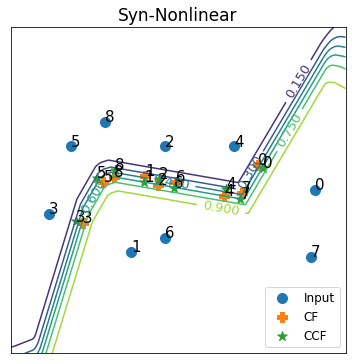

In [22]:
ax = plt.gca()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(6, 6)
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
CS = ax.contour(xx, yy, S)
ax.clabel(CS, fontsize=13, inline=1)
idx = [0, 6, 9, 10, 12, 14, 15, 17, 18]

ax.scatter(dquery[idx, 0], dquery[idx, 1], marker = "o", s = 100, label = "Input")
ax.scatter(dcf[idx, 0], dcf[idx, 1], marker = "P", s = 100, label = "CF")
ax.scatter(dccf[idx, 0], dccf[idx, 1], marker = "*", s = 100, label = "CCF")


for i in range(len(idx)):
    ax.annotate(i, (dquery[idx[i], 0], dquery[idx[i], 1]), fontsize = 15)
    ax.annotate(i, (dcf[idx[i], 0], dcf[idx[i], 1]), fontsize = 15)
    ax.annotate(i, (dccf[idx[i], 0], dccf[idx[i], 1]), fontsize = 15)

ax.legend(loc = 'lower right', fontsize = 12)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Syn-Nonlinear", fontsize = 17)
plt.savefig("CF_vis_nonlinear.pdf", dpi = 600, bbox_inches = 'tight')
plt.show()